In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [2]:
url = "https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz"

dataset = tf.keras.utils.get_file("stack_oveflow_16k", url,
                                 untar=True, cache_dir='.\stack_overflow',
                                 cache_subdir='')

dataset_dir = os.path.dirname(dataset)

In [3]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['csharp', 'java', 'javascript', 'python']

In [4]:
test_dir = os.path.join(dataset_dir, 'test')
os.listdir(test_dir)

['csharp', 'java', 'javascript', 'python']

In [5]:
labels = os.listdir(train_dir)

In [6]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    train_dir, 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='training', 
    seed=seed)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.


In [7]:
batch_size = 32
seed = 42

raw_valid_ds = tf.keras.utils.text_dataset_from_directory(
    train_dir, 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)

Found 8000 files belonging to 4 classes.
Using 1600 files for validation.


In [8]:
for text_batch, label_batch in raw_train_ds.take(1):
    for i in range(3):
        print("Review", text_batch.numpy()[i][100:400])
        print("Label", label_batch.numpy()[i])

Review b' be easily fixed, please forgive me. my program has a tester class with a main. when i send that to my regularpolygon class, it sends it to the wrong constructor. i have two constructors. 1 without perameters..public regularpolygon().    {.       mynumsides = 5;.       mysidelength = 30;.    }//end '
Label 1
Review b" the skin area of an image. but it's ridiculously slow. i don't know how to make it faster ?    ..from colormath.color_objects import *..def skindetection(img, treshold=80, color=[255,20,147]):..    print img.shape.    res=img.copy().    for x in range(img.shape[0]):.        for y in range(img.shape"
Label 3
Review b' files, both rental.txt and customer.txt. inside each text are id numbers of the customer, the videotape they need and the price...i want to place it as an option on my code. right now i have:...add customer.rent return.view list.search.exit...i want to add this as my sixth option. say for example i'
Label 1


In [9]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    test_dir, 
    batch_size=batch_size)

Found 8000 files belonging to 4 classes.


In [10]:
max_features = 10000
sequence_length = 250

vectorize_layer = tf.keras.layers.TextVectorization(
    standardize='lower',
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [11]:
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [12]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label

In [13]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_valid_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
embedding_dim = 16

In [16]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(max_features + 1, embedding_dim),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(4)])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160016    
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 4)                 68        
                                                                 
Total params: 160,084
Trainable params: 160,084
Non-trainable params: 0
__________________________________________________

In [17]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
epochs = 50
train_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/50
200/200 [==============================] - 5s 20ms/step - loss: 1.3786 - accuracy: 0.3342 - val_loss: 1.3683 - val_accuracy: 0.4525
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 1.3529 - accuracy: 0.4367 - val_loss: 1.3338 - val_accuracy: 0.4856
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 1.3075 - accuracy: 0.5144 - val_loss: 1.2784 - val_accuracy: 0.5656
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 1.2408 - accuracy: 0.5927 - val_loss: 1.2053 - val_accuracy: 0.6388
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 1.1609 - accuracy: 0.6464 - val_loss: 1.1262 - val_accuracy: 0.6825
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 1.0791 - accuracy: 0.7008 - val_loss: 1.0500 - val_accuracy: 0.7050
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 1.0016 - accuracy: 0.7275 - val_loss: 0.9809 - val_accuracy: 0.7250
Epoch

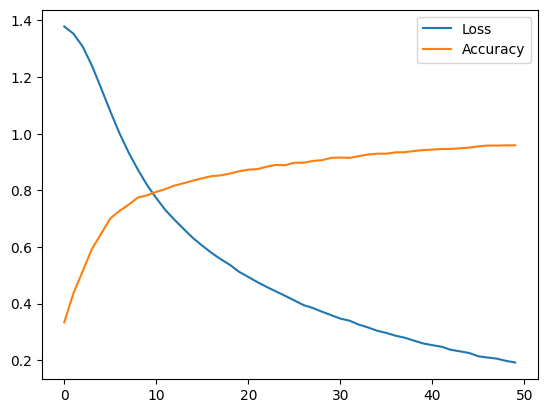

In [19]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['accuracy'])
plt.legend(['Loss', 'Accuracy'])

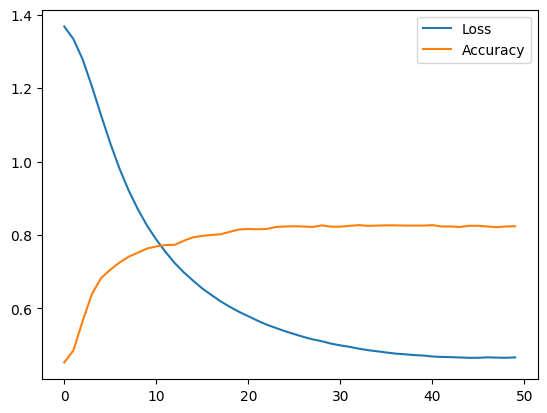

In [20]:
plt.plot(train_history.history['val_loss'])
plt.plot(train_history.history['val_accuracy'])
plt.legend(['Loss', 'Accuracy'])

In [21]:
model.evaluate(test_ds)

250/250 [==============================] - 10s 37ms/step - loss: 0.5279 - accuracy: 0.8026


[0.5278983116149902, 0.8026250004768372]

In [22]:
model.save('CodeOverflowClassification.h5')

# Test it yourself!

In [23]:
working_model = tf.keras.models.load_model('CodeOverflowClassification.h5')

In [24]:
query = input()
prediction = labels[working_model.predict(vectorize_layer(tf.expand_dims(query, -1))).argmax()]
prediction

 0   I have a dataframe containing sensor measurements and labels structured as time series data that looks a bit like this:  df = pd.DataFrame( {'Sensor_ID': {Timestamp('2022-07-04 14:10:54.259355+0000', tz='UTC'): 'sensornode0009', Timestamp('2022-07-04 14:10:54.401380+0000', tz='UTC'): 'sensornode0015', Timestamp('2022-07-04 14:10:55.401182+0000', tz='UTC'): 'sensornode0011', Timestamp('2022-07-04 14:10:55.899093+0000', tz='UTC'): 'sensornode0012', Timestamp('2022-07-04 14:10:59.346954+0000', tz='UTC'): 'sensornode0016'}, 'CO2_Room': {Timestamp('2022-07-04 14:10:54.259355+0000', tz='UTC'): 1150.0, Timestamp('2022-07-04 14:10:54.401380+0000', tz='UTC'): 1300.0, Timestamp('2022-07-04 14:10:55.401182+0000', tz='UTC'): 412.0, Timestamp('2022-07-04 14:10:55.899093+0000', tz='UTC'): 1100.0, Timestamp('2022-07-04 14:10:59.346954+0000', tz='UTC'): 1392.0}, 'CO_Room': {Timestamp('2022-07-04 14:10:54.259355+0000', tz='UTC'): -0.43, Timestamp('2022-07-04 14:10:54.401380+0000', tz='UTC'): -0.08

1/1 [==============================] - 0s 130ms/step


'python'